<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [3]:
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

In [2]:
import requests

# URL of the file to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content of the response to a file
    with open("m4_survey_data.sqlite", "wb") as f:
        f.write(response.content)
    print("File downloaded successfully!")
else:
    print("Failed to download the file.")


File downloaded successfully!


Connect to the database.


In [9]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [6]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [7]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [8]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


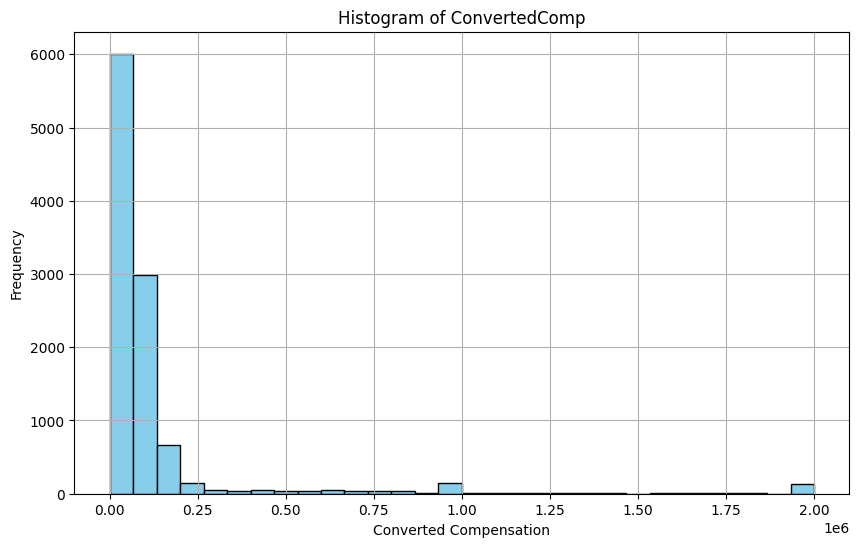

In [15]:
# Query the database and load the data into a DataFrame
query = "SELECT ConvertedComp FROM master"
df = pd.read_sql(query, conn)

# Close the database connection
#conn.close()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df["ConvertedComp"], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of ConvertedComp")
plt.xlabel("Converted Compensation")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### Box Plots


Plot a box plot of `Age.`


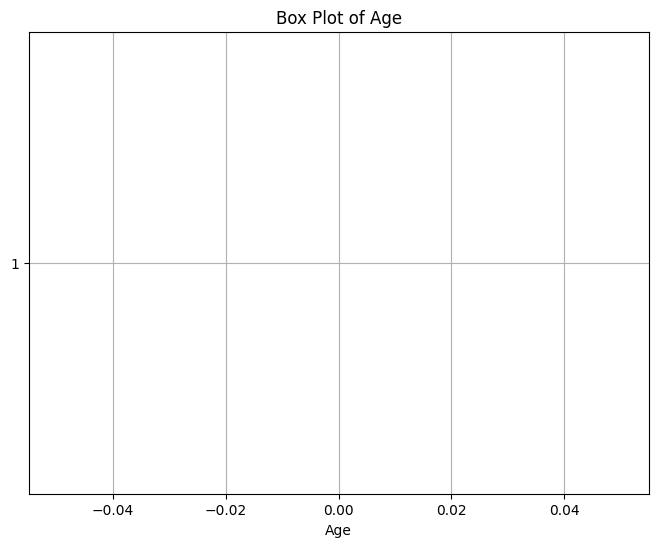

In [16]:
# Query the database and load the data into a DataFrame
query = "SELECT Age FROM master"
df = pd.read_sql(query, conn)

# Close the database connection
#conn.close()

# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df["Age"], vert=False)
plt.title("Box Plot of Age")
plt.xlabel("Age")
plt.grid(True)
plt.show()



## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


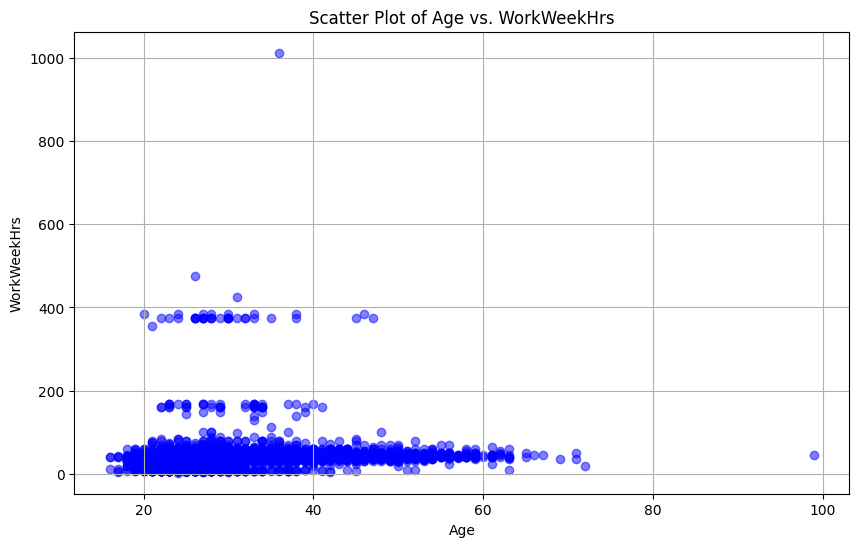

In [17]:
# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query the database and load the data into a DataFrame
query = "SELECT Age, WorkWeekHrs FROM master"
df = pd.read_sql(query, conn)

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df["Age"], df["WorkWeekHrs"], color='blue', alpha=0.5)
plt.title("Scatter Plot of Age vs. WorkWeekHrs")
plt.xlabel("Age")
plt.ylabel("WorkWeekHrs")
plt.grid(True)
plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


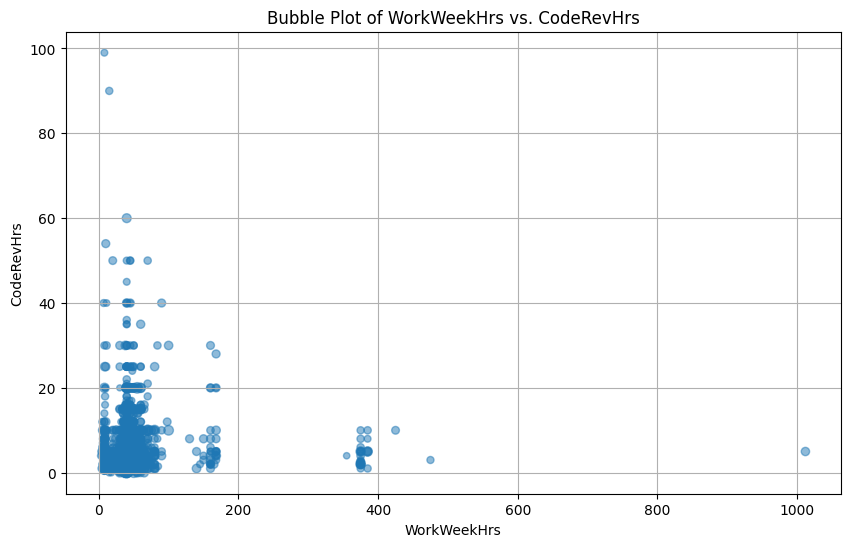

In [18]:
# Query the database and load the data into a DataFrame
query = "SELECT WorkWeekHrs, CodeRevHrs, Age FROM master"
df = pd.read_sql(query, conn)

# Plot bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(df["WorkWeekHrs"], df["CodeRevHrs"], s=df["Age"], alpha=0.5)
plt.title("Bubble Plot of WorkWeekHrs vs. CodeRevHrs")
plt.xlabel("WorkWeekHrs")
plt.ylabel("CodeRevHrs")
plt.grid(True)
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


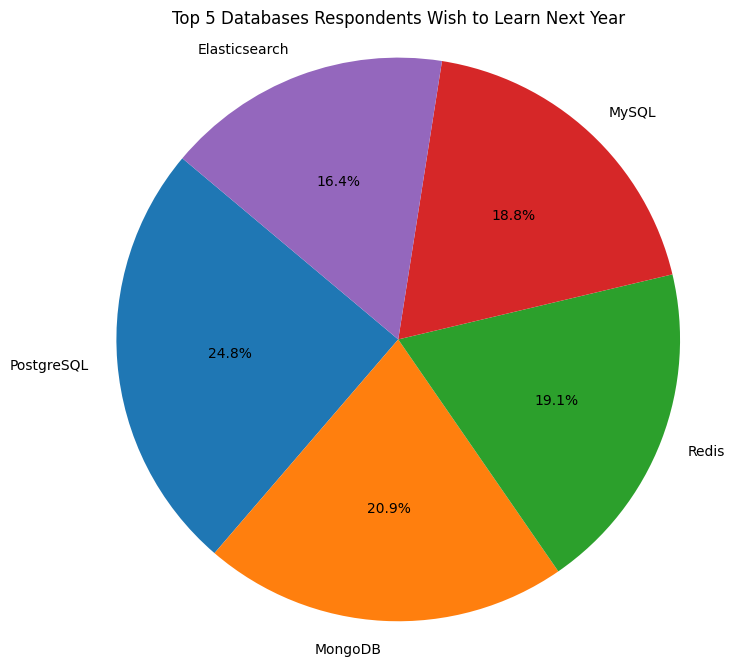

In [19]:
# Query the database to get the counts of each database
query = """
        SELECT DatabaseDesireNextYear, COUNT(*) as count
        FROM DatabaseDesireNextYear
        GROUP BY DatabaseDesireNextYear
        ORDER BY count DESC
        LIMIT 5
        """
df = pd.read_sql(query, conn)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(df["count"], labels=df["DatabaseDesireNextYear"], autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Databases Respondents Wish to Learn Next Year")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


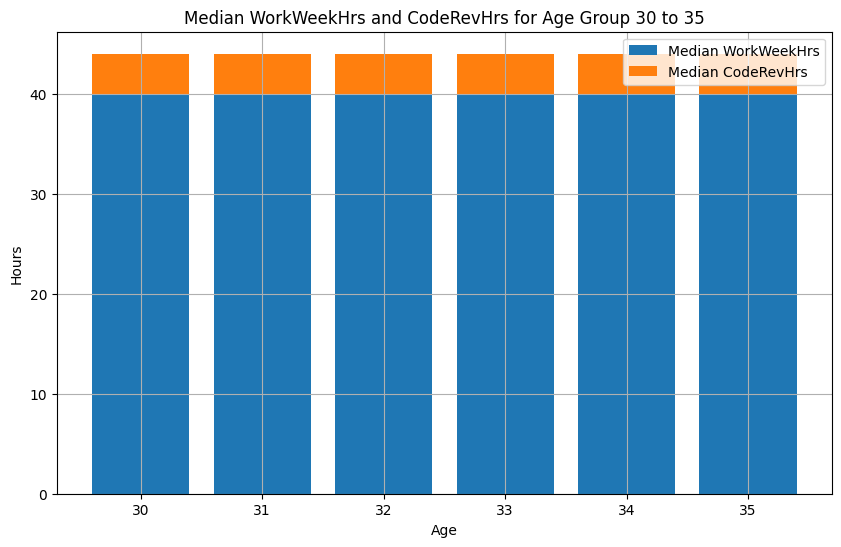

In [22]:
# Query the database to get the data for age group 30 to 35
query = """
        SELECT Age, WorkWeekHrs, CodeRevHrs
        FROM master
        WHERE Age >= 30 AND Age <= 35
        """
df = pd.read_sql(query, conn)

# Calculate median WorkWeekHrs and CodeRevHrs for each age
median_data = df.groupby('Age').median()

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(median_data.index, median_data['WorkWeekHrs'], label="Median WorkWeekHrs")
plt.bar(median_data.index, median_data['CodeRevHrs'], bottom=median_data['WorkWeekHrs'], label="Median CodeRevHrs")
plt.title("Median WorkWeekHrs and CodeRevHrs for Age Group 30 to 35")
plt.xlabel("Age")
plt.ylabel("Hours")
plt.legend()
plt.grid(True)
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


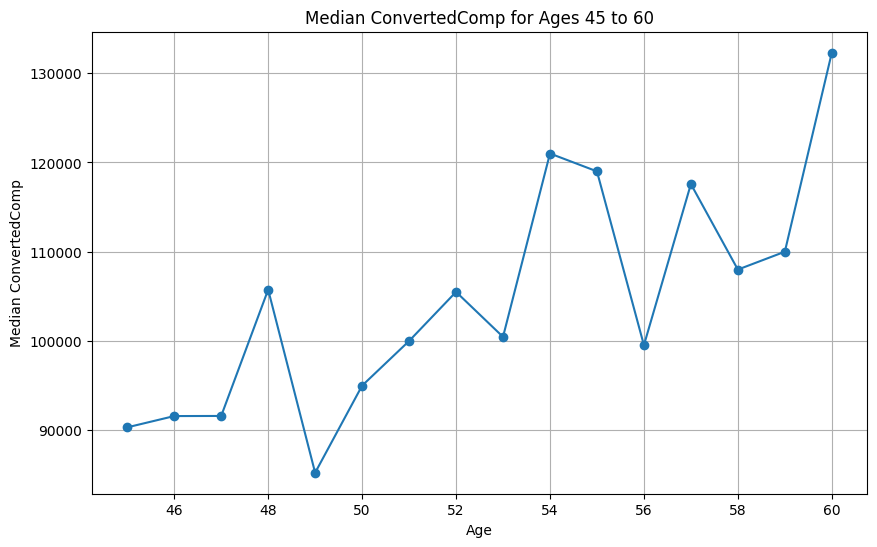

In [23]:
# Query the database to get the data for age group 45 to 60
query = """
        SELECT Age, ConvertedComp
        FROM master
        WHERE Age >= 45 AND Age <= 60
        """
df = pd.read_sql(query, conn)

# Calculate median ConvertedComp for each age
median_data = df.groupby('Age').median()

# Plot median ConvertedComp for all ages from 45 to 60
plt.figure(figsize=(10, 6))
plt.plot(median_data.index, median_data['ConvertedComp'], marker='o', linestyle='-')
plt.title("Median ConvertedComp for Ages 45 to 60")
plt.xlabel("Age")
plt.ylabel("Median ConvertedComp")
plt.grid(True)
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


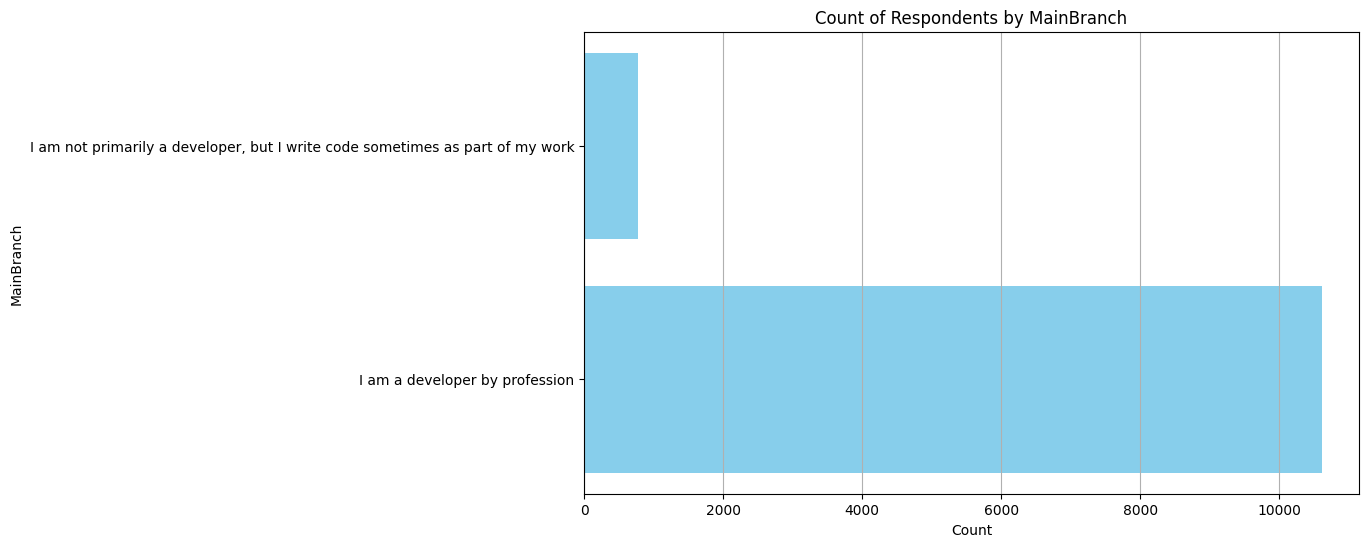

In [24]:
# Query the database to get the counts of each unique value in the MainBranch column
query = """
        SELECT MainBranch, COUNT(*) AS count
        FROM master
        GROUP BY MainBranch
        """
df = pd.read_sql(query, conn)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df["MainBranch"], df["count"], color='skyblue')
plt.title("Count of Respondents by MainBranch")
plt.xlabel("Count")
plt.ylabel("MainBranch")
plt.grid(axis='x')
plt.show()



Close the database connection.


In [25]:
conn.close()

In [31]:
# Get the schema of the database
query = "PRAGMA table_info(master)"
result = conn.execute(query)

# Fetch and print the column names
columns = result.fetchall()
for column in columns:
    print(column[1])

# Close the database connection
conn.close()

index
Respondent
MainBranch
Hobbyist
OpenSourcer
OpenSource
Employment
Country
Student
EdLevel
UndergradMajor
OrgSize
YearsCode
Age1stCode
YearsCodePro
CareerSat
JobSat
MgrIdiot
MgrMoney
MgrWant
JobSeek
LastHireDate
FizzBuzz
ResumeUpdate
CurrencySymbol
CurrencyDesc
CompTotal
CompFreq
ConvertedComp
WorkWeekHrs
WorkRemote
WorkLoc
ImpSyn
CodeRev
CodeRevHrs
UnitTests
PurchaseHow
PurchaseWhat
OpSys
BlockchainOrg
BlockchainIs
BetterLife
ITperson
OffOn
SocialMedia
Extraversion
ScreenName
SOVisit1st
SOVisitFreq
SOFindAnswer
SOTimeSaved
SOHowMuchTime
SOAccount
SOPartFreq
SOJobs
EntTeams
SOComm
WelcomeChange
Age
Trans
Dependents
SurveyLength
SurveyEase


In [38]:
# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query the database to get the count of each main branch
query = """
        SELECT MainBranch, COUNT(*) AS count
        FROM master
        GROUP BY MainBranch
        ORDER BY count DESC
        LIMIT 1
        """
result = conn.execute(query)

# Fetch the result
row = result.fetchone()

# Close the database connection
conn.close()

# Print the majority main branch
majority_main_branch = row[0] if row else "Unknown"
print("Majority of the survey responders are:", majority_main_branch)

Majority of the survey responders are: I am a developer by profession


In [10]:
# Create a cursor object
cur = conn.cursor()

# Define the SQL query to fetch the count of each language respondents wish to learn next year
query = """SELECT LanguageDesireNextYear, COUNT(*) as count
           FROM LanguageDesireNextYear
           GROUP BY LanguageDesireNextYear
           ORDER BY count DESC"""

# Execute the SQL query
cur.execute(query)

# Fetch all rows from the result set
rows = cur.fetchall()

# Find the rank of Python
python_rank = None
for i, row in enumerate(rows):
    language, count = row
    if language == 'Python':
        python_rank = i + 1
        break

# Close the cursor and connection
cur.close()
conn.close()

# Print the rank of Python
print("Rank of Python:", python_rank)

Rank of Python: 3


In [7]:
# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Create a cursor object
cur = conn.cursor()

# Get a list of all tables in the database
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cur.fetchall()

# Print the list of tables
print("Tables in the database:")
for table in tables:
    print(table[0])

# Close the cursor and connection
cur.close()


Tables in the database:
EduOther
DevType
LastInt
JobFactors
WorkPlan
WorkChallenge
LanguageWorkedWith
LanguageDesireNextYear
DatabaseWorkedWith
DatabaseDesireNextYear
PlatformWorkedWith
PlatformDesireNextYear
WebFrameWorkedWith
WebFrameDesireNextYear
MiscTechWorkedWith
MiscTechDesireNextYear
DevEnviron
Containers
SOVisitTo
SONewContent
Gender
Sexuality
Ethnicity
master


In [11]:
# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Create a cursor object
cur = conn.cursor()

# Define the SQL query to count the number of respondents who work with SQL
query = """SELECT COUNT(*)
           FROM LanguageWorkedWith
           WHERE LanguageWorkedWith LIKE '%SQL%'"""

# Execute the SQL query
cur.execute(query)

# Fetch the result
sql_count = cur.fetchone()[0]

# Close the cursor and connection
cur.close()
conn.close()

# Print the number of respondents who work with SQL
print("Number of respondents who work with SQL:", sql_count)

Number of respondents who work with SQL: 7106


In [18]:
# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Create a cursor object
cur = conn.cursor()

# Define the SQL query to count the number of respondents who work on 'MySQL' only
query = """SELECT COUNT(*)
           FROM DatabaseWorkedWith
           WHERE DatabaseWorkedWith LIKE '%MySQL%' AND DatabaseWorkedWith NOT LIKE '%;%';"""

# Execute the SQL query
cur.execute(query)

# Fetch the result
mysql_only_count = cur.fetchone()[0]

# Close the cursor and connection
cur.close()
conn.close()

# Print the number of respondents who work on 'MySQL' only
print("Number of respondents who work on 'MySQL' only:", mysql_only_count)

Number of respondents who work on 'MySQL' only: 5469


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
